In [50]:
!pip install --upgrade pyecharts

  Using cached pyecharts-2.0.3-py3-none-any.whl (147 kB)
  Attempting uninstall: pyecharts
    Found existing installation: pyecharts 0.5.11
    Uninstalling pyecharts-0.5.11:
      Successfully uninstalled pyecharts-0.5.11


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyecharts
print(pyecharts.__version__)
import pyecharts.options as opts
from pyecharts.charts import MapGlobe
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType
from pyecharts.charts import Line
import jieba
from pyecharts.charts import Radar
from pyecharts.commons.utils import JsCode
from  pyecharts.charts import  *
from pyecharts.charts import Pie
from bs4 import BeautifulSoup
from pyecharts.charts import Page
from pyecharts.charts import Grid
from IPython.display import HTML
import base64
%matplotlib inline


In [2]:
data1=pd.read_csv('table/API_EN.ATM.CO2E.LF.KT_DS2_zh_csv_v2_4659128.csv')
data1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,阿鲁巴,ABW,液体燃料消耗的二氧化碳排放量（千吨）,EN.ATM.CO2E.LF.KT,11092.67500,11576.71900,12713.4890,12178.10700,11840.74300,10623.29900,...,1349.456,861.745,872.746,898.415,883.747,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,液体燃料消耗的二氧化碳排放量（千吨）,EN.ATM.CO2E.LF.KT,19042.53518,21102.65584,22561.0374,23749.33821,28592.56934,29917.20125,...,133288.116,139929.053,163665.544,161509.348,164886.655,NaN,NaN,NaN,NaN,NaN
2,阿富汗,AFG,液体燃料消耗的二氧化碳排放量（千吨）,EN.ATM.CO2E.LF.KT,271.35800,293.36000,363.0330,392.36900,476.71000,542.71600,...,6761.948,4785.435,3773.343,4741.431,3476.316,NaN,NaN,NaN,NaN,NaN
3,NaN,AFW,液体燃料消耗的二氧化碳排放量（千吨）,EN.ATM.CO2E.LF.KT,6934.29700,7422.00800,7623.6930,8401.09700,9699.21500,12115.76800,...,109181.258,115913.870,124190.289,114733.096,121869.078,NaN,NaN,NaN,NaN,NaN
4,安哥拉,AGO,液体燃料消耗的二氧化碳排放量（千吨）,EN.ATM.CO2E.LF.KT,348.36500,311.69500,1008.4250,1034.09400,1041.42800,1012.09200,...,17282.571,17454.920,28265.236,17080.886,17931.630,NaN,NaN,NaN,NaN,NaN


In [3]:
data1.isnull().sum()

Country Name        2
Country Code        0
Indicator Name      0
Indicator Code      0
1960               64
                 ... 
2017              266
2018              266
2019              266
2020              266
2021              266
Length: 66, dtype: int64

In [4]:
data=data1.drop(["2021","2020","2019","2018","2017"],axis=1)

In [5]:
data=data.fillna(value=0)

In [6]:
data.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2012              0
2013              0
2014              0
2015              0
2016              0
Length: 61, dtype: int64

In [7]:
data.shape

(266, 61)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            266 non-null    float64
 5   1961            266 non-null    float64
 6   1962            266 non-null    float64
 7   1963            266 non-null    float64
 8   1964            266 non-null    float64
 9   1965            266 non-null    float64
 10  1966            266 non-null    float64
 11  1967            266 non-null    float64
 12  1968            266 non-null    float64
 13  1969            266 non-null    float64
 14  1970            266 non-null    float64
 15  1971            266 non-null    float64
 16  1972            266 non-null    float64
 17  1973            266 non-null    flo

### 1、转换国家编码

In [9]:
code=pd.read_csv('table/2021_population.csv')
code=code.iloc[:,:2]
code.head()

,iso_code,country
0,CHN,China
1,IND,India
2,USA,United States
3,IDN,Indonesia
4,PAK,Pakistan


In [10]:
tran_l=dict()
for x in code.values:
    if x[0] not in tran_l:
        tran_l[x[0]]=x[1]
def trans_to_country(x):
    if x in tran_l:
        return tran_l[x]
    else:
        return 'miss'
data['country']=data['Country Code'].apply(trans_to_country)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,country
0,阿鲁巴,ABW,液体燃料消耗的二氧化碳排放量（千吨）,EN.ATM.CO2E.LF.KT,11092.67500,11576.71900,12713.4890,12178.10700,11840.74300,10623.29900,...,2658.5750,2629.2390,2508.2280,2500.8940,1349.456,861.745,872.746,898.415,883.747,Aruba
1,0,AFE,液体燃料消耗的二氧化碳排放量（千吨）,EN.ATM.CO2E.LF.KT,19042.53518,21102.65584,22561.0374,23749.33821,28592.56934,29917.20125,...,130569.3866,148944.8859,122216.8869,140584.9783,133288.116,139929.053,163665.544,161509.348,164886.655,miss
2,阿富汗,AFG,液体燃料消耗的二氧化碳排放量（千吨）,EN.ATM.CO2E.LF.KT,271.35800,293.36000,363.0330,392.36900,476.71000,542.71600,...,2812.5890,4946.7830,5870.8670,7609.0250,6761.948,4785.435,3773.343,4741.431,3476.316,Afghanistan
3,0,AFW,液体燃料消耗的二氧化碳排放量（千吨）,EN.ATM.CO2E.LF.KT,6934.29700,7422.00800,7623.6930,8401.09700,9699.21500,12115.76800,...,71532.1690,66706.3970,105499.5900,118290.0860,109181.258,115913.870,124190.289,114733.096,121869.078,miss
4,安哥拉,AGO,液体燃料消耗的二氧化碳排放量（千吨）,EN.ATM.CO2E.LF.KT,348.36500,311.69500,1008.4250,1034.09400,1041.42800,1012.09200,...,10227.2630,12306.4520,13380.8830,14356.3050,17282.571,17454.920,28265.236,17080.886,17931.630,Angola


In [11]:
# 剔除‘miss'空值
data=data[data['country']!='miss']
data.shape

(212, 62)

In [12]:
df=data[['country','2016']]
df.head()

,country,2016
0,Aruba,883.747
2,Afghanistan,3476.316
4,Angola,17931.630
5,Albania,3362.639
6,Andorra,469.376


In [13]:
pop=[list(x) for x in df.values]


In [14]:
mum=df['2016'].sum()
mu=mum/212
sigma=np.std(df['2016'])


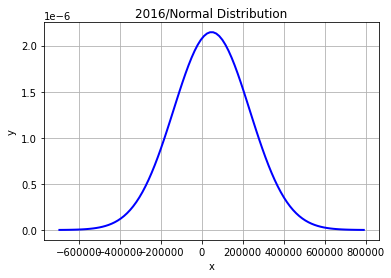

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 生成正态分布数据

 
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = np.exp(- (x - mu)**2 / (2*sigma**2)) / (sigma * np.sqrt(2*np.pi))

# 绘制图形
plt.plot(x, y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('2016/Normal Distribution')
plt.grid(True)
plt.show()

### 2、全球CO2排放量

In [16]:
import pyecharts.options as opts
from pyecharts.charts import MapGlobe

data2 = [x for _, x in pop]
low, high = min(df['2016']), max(df['2016'])
def map1():
    c1 = (
        MapGlobe()
        .add_schema()
        .add(
            maptype="world",
            series_name="全球液体燃料消耗的二氧化碳排排放量",
            data_pair=pop,
            is_map_symbol_show=True,#首都
            label_opts=opts.LabelOpts(is_show=True),#国家名
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="2016世界液体燃料消耗的二氧化碳排放量分布"),
            visualmap_opts=opts.VisualMapOpts(
                min_=low,
                max_=high,
                range_text=["min", "max"],
                is_calculable=True,
                range_color=["lightskyblue", "yellow","orangered","red"],
            )
        )
    )
    return c1
map1().render("visual1/global.html")
map1().render_notebook()

In [17]:
from pyecharts import options as opts
from pyecharts.charts import Map
def map2():
    c2 = (
        Map()
        .add("全球二氧化碳排放量", pop, "world",is_map_symbol_show=False)
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="",subtitle="2016全球CO2排放量"),
            visualmap_opts=opts.VisualMapOpts(max_=2127054.351),#max设为5亿
        )
    )
    return c2
map2().render("visual1/global1.html")
map2().render_notebook()

In [18]:
df1=df
df1.to_csv('ciyun/result.txt',sep='\t',index=False)

In [19]:
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Line
import jieba
import matplotlib.pyplot as plt

with open('ciyun/result.txt', 'r', encoding='utf-8') as f:
    lines= f.readlines()

    countries= [line.split()[0] for line in lines]  # 第一列数据，人名
    values = [line.split()[1] for line in lines]  # 第二列数据，出现次数

# 生成词云图
def word():
    wordcloud = (
        WordCloud(init_opts={"bg_color": None})

        .add("", zip(countries,values), word_size_range=[20,200])
        .set_global_opts(title_opts=opts.TitleOpts(title="",subtitle="2016全球液体燃料消耗的二氧化碳排放量"))
    )
    return wordcloud
# 保存词云图
word().render("visual1/wordcloud.html")
word().render_notebook()

In [30]:
from pyecharts import options as opts
from pyecharts.charts import Radar

sum_pop = data4['current_population'].sum()
v1=data4[data4['country']=='China'].values[0][2]
v2=data4[data4['country']=='United States'].values[0][2]
v3=data4[data4['country']=='India'].values[0][2]
v1=v1/1000
v2=v2/1000
v3=v3/1000
other=sum_pop-v1-v2-v3
other=other/1000
v11=df[df['country']=='China'].values[0][1]
v22=df[df['country']=='United States'].values[0][1]
v33=df[df['country']=='India'].values[0][1]
other1=df['2016'].sum()-v1-v2-v3

# 数据
schema = [
    {"name": "中国", "max": 8000000},
    {"name": "美国", "max": 8000000},
    {"name": "印度", "max": 8000000},
    {"name": "其他", "max": 8000000},
  
]
data6 = [
    [1336397.813, 2127054.351, 648956.324, 5952641.099999999]]
data7=  [  [1443839.846,332764.085,1392365.583,7834929.79086]
    
]

# 雷达图
radar = (
    Radar()
    .add_schema(schema)
    .add("2016年液体燃料的CO2排放量", data6,color='blue',areastyle_opts=opts.AreaStyleOpts(opacity=0.3,color='blue'))
    .add("2016年世界人口数量", data7,color='red',areastyle_opts=opts.AreaStyleOpts(opacity=0.3,color='red'))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        legend_opts=opts.LegendOpts(),
        title_opts=opts.TitleOpts(title="关系雷达图"),
       
    )
)

# 渲染图表

radar.render('visual1/radar.html')
radar.render_notebook()

### 3、中国排放量变化趋势

In [ ]:
time=list(range(1960,2017))#时间从1960-2016
vol=data[data['country']=='China'].values[0][4:-1]#1960-2016的CO2排放量
len(time),len(vol)

In [21]:
import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.commons.utils import JsCode


x_data = [str(i) for i in time]
y_data = [int(i) for i in vol]

background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#008B8B'}, {offset: 1, color: '#06a7ff'}], false)"
)
area_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#8FBC8F '}, {offset: 1, color: '#3fbbff0d'}], false)"
)
def line1():
    c3 = (
        Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js)))
        .add_xaxis(xaxis_data=x_data)
        .add_yaxis(
            series_name="注册总量",
            y_axis=y_data,
            is_smooth=True,
            is_symbol_show=False,
            symbol="circle",
            symbol_size=6,
            linestyle_opts=opts.LineStyleOpts(color="#fff"),
            label_opts=opts.LabelOpts(is_show=True, position="top", color="white"),
            itemstyle_opts=opts.ItemStyleOpts(
                color="red", border_color="#fff", border_width=3
            ),
            tooltip_opts=opts.TooltipOpts(is_show=False),
            areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="1960-2016中国液体燃料消耗的二氧化碳排放量",
                pos_bottom="95%",
                pos_left="center",
                title_textstyle_opts=opts.TextStyleOpts(color="#fff", font_size=16),
            ),
            xaxis_opts=opts.AxisOpts(
                type_="category",
                boundary_gap=False,
                axislabel_opts=opts.LabelOpts(margin=30, color="#ffffff63"),
                axisline_opts=opts.AxisLineOpts(is_show=False),
                axistick_opts=opts.AxisTickOpts(
                    is_show=True,
                    length=25,
                    linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
                ),
                splitline_opts=opts.SplitLineOpts(
                    is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                ),
            ),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                position="right",
                axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63"),
                axisline_opts=opts.AxisLineOpts(
                    linestyle_opts=opts.LineStyleOpts(width=2, color="#fff")
                ),
                axistick_opts=opts.AxisTickOpts(
                    is_show=True,
                    length=15,
                    linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
                ),
                splitline_opts=opts.SplitLineOpts(
                    is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                ),
            ),
            legend_opts=opts.LegendOpts(is_show=False),
        )
    )
    return c3
line1().render("visual1/1960-2016.html")
line1().render_notebook()

NameError: name 'time' is not defined

In [22]:
time1=list(range(2010,2017))
vol1=data[data['country']=='China'].values[0][54:-1]
len(time1),len(vol1)

(7, 7)

In [23]:
import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.commons.utils import JsCode


x_data = [str(i) for i in time1]
y_data = [int(i) for i in vol1]

background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#8B008B'}, {offset: 1, color: '#06a7ff'}], false)"
)
area_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#E6E6FA'}, {offset: 1, color: '#3fbbff0d'}], false)"
)
def line2():
    c4 = (
        Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js)))
        .add_xaxis(xaxis_data=x_data)
        .add_yaxis(
            series_name="注册总量",
            y_axis=y_data,
            is_smooth=True,
            is_symbol_show=False,
            symbol="circle",
            symbol_size=6,
            linestyle_opts=opts.LineStyleOpts(color="#fff"),
            label_opts=opts.LabelOpts(is_show=True, position="top", color="white"),
            itemstyle_opts=opts.ItemStyleOpts(
                color="red", border_color="#fff", border_width=3
            ),
            tooltip_opts=opts.TooltipOpts(is_show=False),
            areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="",
                subtitle="2010-2016中国液体燃料消耗的二氧化碳排放量",
                pos_bottom="95%",
                pos_left="center",
                title_textstyle_opts=opts.TextStyleOpts(color="WHITE", font_size=16),
            ),
            xaxis_opts=opts.AxisOpts(
                type_="category",
                boundary_gap=False,
                axislabel_opts=opts.LabelOpts(margin=30, color="#ffffff63"),
                axisline_opts=opts.AxisLineOpts(is_show=False),
                axistick_opts=opts.AxisTickOpts(
                    is_show=True,
                    length=25,
                    linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
                ),
                splitline_opts=opts.SplitLineOpts(
                    is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                ),
            ),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                position="right",
                axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63"),
                axisline_opts=opts.AxisLineOpts(
                    linestyle_opts=opts.LineStyleOpts(width=2, color="#fff")
                ),
                axistick_opts=opts.AxisTickOpts(
                    is_show=True,
                    length=15,
                    linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
                ),
                splitline_opts=opts.SplitLineOpts(
                    is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                ),
            ),
            legend_opts=opts.LegendOpts(is_show=False),
        )
    )
    return c4
line2().render("visual1/2010-2016.html")
line2().render_notebook()

In [24]:
time3=list(range(2005,2017))
vol3=data[data['country']=='China'].values[0][49:-1]
vol4=data[data['country']=='United States'].values[0][49:-1]
len(time3),len(vol3),len(vol4)

(12, 12, 12)

In [25]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Line
from  pyecharts.charts import  *
x=[str(k) for k in time3]
y1_data = [int(i) for i in vol3]
y2_data = [int(j) for j in vol4]
def pi1():
    line1=Line(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    #添加x轴
    line1.add_xaxis(xaxis_data=x)
    #添加y轴
    line1.add_yaxis(series_name="中国",y_axis=y1_data)
    line1.add_yaxis(series_name="美国",y_axis=y2_data)
    line1.set_global_opts(title_opts=opts.TitleOpts(title="", subtitle="2005-2016中美CO2排放量"))
    line1.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    return line1

pi1().render("visual1/line.html")
pi1().render_notebook()

In [26]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Line
from  pyecharts.charts import  *
x=[str(k) for k in time3]
y1_data = [int(i) for i in vol3]
y2_data = [int(j) for j in vol4]
def pi():
    bar=Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    bar.add_xaxis(x)
    bar.add_yaxis("中国",y1_data)
    bar.add_yaxis("美国",y2_data)
    bar.set_global_opts(title_opts=opts.TitleOpts(title="", subtitle="2005-2016中美CO2排放量"))  
  

    line=Line(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    #添加x轴
    line.add_xaxis(xaxis_data=x)
    #添加y轴
    line.add_yaxis(series_name="中国折线",y_axis=y1_data)
    line.add_yaxis(series_name="美国折线",y_axis=y2_data)
    line.set_global_opts(title_opts=opts.TitleOpts(title="", subtitle=""))
    line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    
    all=bar.overlap(line)
    return all
pi().render("visual1/bar_line.html")
pi().render_notebook()

In [27]:
data4=pd.read_csv('table/timeseries_population_count.csv')
data4.head()

,iso_code,country,current_population,updated_datetime
0,CHN,China,1443839846,55:28.5
1,IND,India,1392365583,55:28.5
2,USA,United States,332764085,55:28.5
3,IDN,Indonesia,276140523,55:28.5
4,PAK,Pakistan,224866511,55:28.5


In [28]:
from pyecharts.charts import Pie
sum_pop = data4['current_population'].sum()

v1=data4[data4['country']=='China'].values[0][2]

v2=data4[data4['country']=='United States'].values[0][2]

v3=data4[data4['country']=='India'].values[0][2]
other=sum_pop-v1-v2-v3
data5= [("中国",v1/sum_pop ), ("美国", v2/sum_pop), ("印度", v3/sum_pop),("其他国家",other/sum_pop)]
def pie():
    pie = (
        Pie(init_opts={"bg_color": None})
        .add("",
            data5,
            radius=["30%", "70%"],
            center=["50%", "50%"],
            rosetype="radius",
            label_opts=opts.LabelOpts(is_show=True),
        )
        .set_series_opts(tooltip_opts=opts.TooltipOpts(is_show=True,trigger="item",formatter="{b}: {c}({d}%) "))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="世界人口比例3D饼图"),
            legend_opts=opts.LegendOpts(is_show=True, orient="vertical", pos_left="2%", pos_top="20%"),

        )
        )
    return pie
pie().render("visual1/pop_pie.html")
pie().render_notebook()


In [39]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Line
from pyecharts.charts import Grid
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Page
from IPython.display import HTML
import base64



page = Page(layout=Page.DraggablePageLayout,page_title="基于Pyecharts的销售数据大屏")
page.add(

    map2(),
    pi(),
    pi1(),
    word(),
    pie(),
    
    )

  
page.render("visual1/sum1.html") 


'C:\\Users\\Clock Yiyi\\Desktop\\大数据分析\\visual1\\sum1.html'

In [37]:
page.save_resize_html('visual1/sum1.html', cfg_file='visual1/chart_config1.json', dest='visual1/数据可视化大屏1.html')

'<!DOCTYPE html>\n<html>\n<head>\n    <meta charset="UTF-8">\n    <title>基于Pyecharts的销售数据大屏</title>\n                <script type="text/javascript" src="https://assets.pyecharts.org/assets/v5/echarts.min.js"></script>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/v5/maps/world.js"></script>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/v5/echarts-wordcloud.min.js"></script>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/v5/jquery.min.js"></script>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/v5/jquery-ui.min.js"></script>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/v5/ResizeSensor.js"></script>\n\n            <link rel="stylesheet"  href="https://assets.pyecharts.org/assets/v5/jquery-ui.css">\n\n</head>\n<body >\n    <style>.box {  } </style>\n        \n    <div class="box">\n                

In [40]:
from bs4 import BeautifulSoup
from pyecharts.charts import Page

Page.save_resize_html("visual1/数据可视化大屏1.html", cfg_file="visual1/chart_config1.json")


with open("visual1/数据可视化大屏1.html", "r+", encoding='utf-8') as html:
    html_bf = BeautifulSoup(html, 'lxml')
    body = html_bf.find("body")
    body["style"] = "background-image: url(background.jpg)"  
    html_new = str(html_bf)
    html.seek(0, 0)
    html.truncate()
    html.write(html_new)
